In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [4]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.0005699516519476382, 0.0004929120598308043, 0.0012566899029623545, 0.0004950391157231435, 0.0004518030371549409, 0.00046819394462347183, 0.0004955255462179124, 0.0005323208286401765, 0.00045564749392060304, 0.00047577061488484853]
    Error u of fuhe active learning(LHS sampling): 5.693854e-04
    [0.00018048538548070826, 0.00015242791700500178, 0.00032763207743430057, 0.00015457746584684936, 0.0001368868448892315, 0.00014179522421386154, 0.0001548347404831226, 0.00017439151403457153, 0.00013784934960944388, 0.0001458418817689106]
    MAE of fuhe active learning(LHS sampling): 1.706722e-04
    [6.774567710673108e-08, 5.0272585575614666e-08, 3.1625638763433416e-07, 5.082698556093488e-08, 4.240772493312518e-08, 4.539654667155842e-08, 5.094690595104137e-08, 6.012227865103933e-08, 4.311262800763308e-08, 4.681411440727687e-08]
    MSE of fuhe active learning(LHS sampling): 7.739018e-08
    [0.00012285664, 0.0022229275, 7.4937896e-05, 3.045863e-05, 0.0005867067, 9.00173e-05, 0.00010166661, 0.00014585425, 0.00014299189, 0.029513337]
    Chaos of fuhe active learning(LHS sampling): 3.303175e-03
    [4.864114e-07, 5.625959e-07, 5.1029633e-07, 4.7208448e-07, 4.6870173e-07, 4.2956322e-07, 5.8473984e-07, 4.868764e-07, 4.7052822e-07, 3.9702263e-07]
    Residual of fuhe active learning(LHS sampling): 4.868820e-07
    """,
    'Xianxing': """
    [0.002069372140017121, 0.0009318589459527695, 0.0003805648406182378, 0.0004911167070808823, 0.00047132003185745434, 0.0004874643922605124, 0.000482139396428988, 0.00048263035730341565, 0.00041940566081484715, 0.0004939456518232694]
    Error u of fuhe active learning(LHS sampling): 6.709818e-04
    [0.0005987860937128765, 0.0002721971938293058, 0.00012161645358251643, 0.00015247556998752645, 0.00014502754199694835, 0.00015065817712490222, 0.00014817376848562917, 0.00014780434606828527, 0.00012941789194340759, 0.0001537137488962908]
    MAE of fuhe active learning(LHS sampling): 2.019871e-04
    [8.855701390034132e-07, 1.7609847155530335e-07, 3.154509748844462e-08, 4.9962973398737785e-08, 4.5918129850114724e-08, 4.910921111807972e-08, 4.802122639855831e-08, 4.814015144931682e-08, 3.70776975404566e-08, 5.0528339801746145e-08]
    MSE of fuhe active learning(LHS sampling): 1.421971e-07
    [0.00010327557, 0.011731667, 7.553415e-05, 3.640775e-05, 0.0015806673, 8.354015e-05, 8.9424095e-05, 0.0001544395, 0.00017956321, 0.0029545943]
    Chaos of fuhe active learning(LHS sampling): 1.698911e-03
    [5.3346616e-07, 5.736674e-07, 4.9018877e-07, 5.264725e-07, 4.2751458e-07, 3.7412974e-07, 5.048919e-07, 4.54796e-07, 5.1004486e-07, 3.9442602e-07]
    Residual of fuhe active learning(LHS sampling): 4.789598e-07
    """,
    'Active': """
    [0.8407448953878035, 0.0006289738216378826, 0.5000183716576511, 0.00046607656163076447, 0.00048720832945583993, 0.0005141490390487713, 0.001247149974633925, 0.0005215830242152358, 0.0005491277702819459, 0.0009596275436547793]
    Error u of fuhe active learning(LHS sampling): 1.346137e-01
    [0.21779268148148143, 0.00022129318256990343, 0.12275125898505271, 0.00014682559563571458, 0.00015066961340869678, 0.0001610299009723126, 0.0003869755833269549, 0.00016767791676029726, 0.000171434041016213, 0.00032763318128877135]
    MAE of fuhe active learning(LHS sampling): 3.422775e-02
    [0.14209816505950743, 9.013643076264195e-08, 0.05028328178627376, 5.0615967502318755e-08, 4.9082311719705074e-08, 5.4622602950594376e-08, 3.2806523834062306e-07, 5.683919556652739e-08, 6.32633383867956e-08, 2.1269248999440846e-07]
    MSE of fuhe active learning(LHS sampling): 1.923824e-02
    [0.0012168993, 0.002165743, 0.0, 0.00080151425, 0.010833327, 0.0029052787, 0.01026045, 0.00014972323, 0.0012691873, 5.5764263e-05]
    Chaos of fuhe active learning(LHS sampling): 2.965789e-03
    [8.353746e-18, 4.2778765e-07, 7.4316273e-07, 4.4730723e-07, 4.8010133e-07, 3.6545612e-07, 4.2995725e-07, 4.7077538e-07, 4.744661e-07, 4.961166e-07]
    Residual of fuhe active learning(LHS sampling): 4.335130e-07
    """,
    'Residual': """
    [0.0005299288075965455, 0.0004551773318923641, 0.0005579815833606775, 0.00042461255434338055, 0.6221720622252012, 0.0009244388079192532, 0.0003217800785188063, 0.00041747346175142726, 0.0005248117448576558, 0.0004905972682993144]
    Error u of fuhe active learning(LHS sampling): 6.268189e-02
    [0.0001576014153908506, 0.00013845034870174088, 0.00017454133782997708, 0.00013604583551020754, 0.15982598732569667, 0.0002596379108787147, 9.848205661250486e-05, 0.0001318791812501021, 0.00016219609580376117, 0.00014582016314113397]
    MAE of fuhe active learning(LHS sampling): 1.612306e-02
    [5.8351926051213764e-08, 4.354002239884285e-08, 6.531210025366719e-08, 3.973412905114802e-08, 0.07841265295377735, 1.709896695724606e-07, 2.4980312286510294e-08, 3.833856078377913e-08, 5.689229939602909e-08, 4.9722453987886244e-08]
    MSE of fuhe active learning(LHS sampling): 7.841320e-03
    [0.000112795424, 0.0026282978, 0.00021051615, 6.980605e-05, 0.00024810917, 7.49897e-05, 9.9845696e-05, 0.00011962381, 0.018826716, 0.0067380113]
    Chaos of fuhe active learning(LHS sampling): 2.912871e-03
    [5.204829e-07, 4.6180412e-07, 4.4490525e-07, 4.6278683e-07, 2.438319e-07, 3.8570784e-07, 4.2628506e-07, 4.7347748e-07, 4.4858598e-07, 4.6778996e-07]
    Residual of fuhe active learning(LHS sampling): 4.335657e-07
    """,
    'Fuhe': """
    [0.000916751238474116, 0.0012282608282823855, 0.00045693664323712314, 0.0005556475975738735, 0.0004573180132531624, 0.00044900894872684744, 0.0004485880595464926, 0.8407448953878035, 0.30454014398901524, 0.0004548651186974136]
    Error u of fuhe active learning(LHS sampling): 1.150252e-01
    [0.00025898091355195995, 0.00036683121166064796, 0.00013831169522020008, 0.00018172684714993535, 0.00014330885986885735, 0.0001363582101398919, 0.00013913289829852935, 0.2177926814814815, 0.07804392028916304, 0.00013826511647893042]
    MAE of fuhe active learning(LHS sampling): 2.973395e-02
    [1.7565791951955304e-07, 3.083783282422051e-07, 4.3311767179364335e-08, 6.551202800237404e-08, 4.452621891636851e-08, 4.184539478086705e-08, 4.2763024124590895e-08, 0.14209816505950743, 0.019143705997825586, 4.3329384385993914e-08]
    MSE of fuhe active learning(LHS sampling): 1.612426e-02
    [0.00010235844, 0.00502297, 0.00015173893, 0.011308271, 0.008238857, 7.700975e-05, 0.0001372657, 0.0, 0.00046176728, 0.009272396]
    Chaos of fuhe active learning(LHS sampling): 3.477263e-03
    [4.4570697e-07, 4.485762e-07, 4.3899058e-07, 4.765525e-07, 5.0502604e-07, 4.6440528e-07, 4.803039e-07, 1.3615753e-18, 2.4685287e-06, 4.2756233e-07]
    Residual of fuhe active learning(LHS sampling): 6.155652e-07
    """,
    'Chaos': """
    [0.0004927691407041606, 0.5922375028430962, 0.3306601474151915, 0.0006328132814266662, 0.5617974568008343, 0.0004974791084760778, 0.0009151637368940032, 0.00048269491606392495, 0.0006563563427320136, 0.0012348473901453844]
    Error u of fuhe active learning(LHS sampling): 1.489607e-01
    [0.00015253555136283213, 0.143250441265993, 0.08967086266385399, 0.00021959226063214624, 0.1398001703421743, 0.0001577609873923984, 0.00031666048288397214, 0.00014869981548162807, 0.00023170062569302676, 0.00040801180026799375]
    MAE of fuhe active learning(LHS sampling): 3.743564e-02
    [5.052815798858295e-08, 0.0705929416887539, 0.021815037511121165, 8.9267868596159e-08, 0.0641581918469694, 5.1577603625395126e-08, 1.9136129757354547e-07, 4.82163443026309e-08, 9.742490058169635e-08, 3.380984864842036e-07]
    MSE of fuhe active learning(LHS sampling): 1.565670e-02
    [0.009513864, 510.8327, 0.0, 2.4409124e-05, 1373.2224, 9.496711e-05, 8.172786e-05, 0.0001336733, 0.00015224161, 0.00025750953]
    Chaos of fuhe active learning(LHS sampling): 1.884065e+02
    [4.8198217e-07, 8.0360286e-07, 1.5409707e-06, 4.5031584e-07, 1.2713217e-06, 4.4356352e-07, 4.6731407e-07, 4.445144e-07, 4.8273887e-07, 5.3322583e-07]
    Residual of fuhe active learning(LHS sampling): 6.919550e-07
    """,
    '0.9Residual': """
    [0.0005042752482917221, 0.0004730449281292278, 0.0002949272466534155, 0.00033953802957656793, 0.0004941024501602721, 0.0004751845848915249, 0.0002497949302476663, 0.00038929510150906104, 0.0005017807477885601, 0.00047524687725179494]
    Error u of fuhe active learning(LHS sampling): 4.197190e-04
    [0.00015066375490156586, 0.00014533166876387366, 0.0001085501285896934, 0.00012634257430954804, 0.00014935852920829938, 0.00014526465634353886, 8.737907832238758e-05, 0.00011910868582409192, 0.00015646643820566833, 0.00014245331864869864]
    MAE of fuhe active learning(LHS sampling): 1.330919e-04
    [5.3565681497875596e-08, 4.7471864059670076e-08, 2.543261626208861e-08, 3.2875273073370516e-08, 5.082660408520481e-08, 4.653645027225497e-08, 1.687366442910827e-08, 3.235166572394183e-08, 5.170925036045635e-08, 4.686461913914974e-08]
    MSE of fuhe active learning(LHS sampling): 4.045077e-08
    [9.5939446e-05, 0.0057054004, 0.00016730407, 8.066953e-05, 0.015212904, 8.44042e-05, 9.511123e-05, 0.00013553613, 0.017191216, 0.0075643496]
    Chaos of fuhe active learning(LHS sampling): 4.633283e-03
    [4.4302783e-07, 4.6499144e-07, 4.3175544e-07, 4.3803107e-07, 4.5902812e-07, 4.141241e-07, 4.6304376e-07, 4.8796164e-07, 4.885185e-07, 4.7595563e-07]
    Residual of fuhe active learning(LHS sampling): 4.566437e-07
    """,
    '0.8Residual': """
    [0.0016174020792013239, 0.00044498671011162757, 0.0004978244466186262, 0.00046135185814317813, 0.0004496073481756892, 0.00046732570549665116, 0.00032653952368921996, 0.0009278307116255319, 0.320219292698571, 0.0018711463119528069]
    Error u of fuhe active learning(LHS sampling): 3.272833e-02
    [0.00042817836026594406, 0.00013689689966555764, 0.00015014935738182886, 0.0001471651210174792, 0.00013855787974194065, 0.0001428914822401251, 0.0001020867088191884, 0.0002673366308499428, 0.08065135382075596, 0.0004936043505051659]
    MAE of fuhe active learning(LHS sampling): 8.265822e-03
    [5.266863576167345e-07, 4.191503844595661e-08, 5.141132547607083e-08, 4.635004622863439e-08, 4.264302317194973e-08, 4.522954898810606e-08, 2.2440107986480427e-08, 1.7977040499404712e-07, 0.020498825593902086, 6.959194074683534e-07]
    MSE of fuhe active learning(LHS sampling): 2.050048e-03
    [0.00010427184, 0.000882225, 0.0001714541, 8.671041e-05, 0.0065936, 8.6952015e-05, 0.00011066314, 0.00012476597, 0.0011012616, 0.005784474]
    Chaos of fuhe active learning(LHS sampling): 1.504638e-03
    [5.0515064e-07, 4.7637968e-07, 4.9316805e-07, 4.939395e-07, 5.6053955e-07, 4.657752e-07, 5.011839e-07, 4.8664015e-07, 1.1673692e-06, 4.6581977e-07]
    Residual of fuhe active learning(LHS sampling): 5.615966e-07
    """,
    '0.7Residual': """
    [0.00043842743402580864, 0.00045193700685087747, 0.0004394856065195901, 0.0004623025499908193, 0.00047094172215384053, 0.0011731222468933688, 0.00038636140686498864, 0.0006613834148220792, 0.8539457305960557, 0.00046016986419447403]
    Error u of fuhe active learning(LHS sampling): 8.588899e-02
    [0.00013418518418422426, 0.00013960565399561822, 0.00013405725349696242, 0.0001410384506975939, 0.00014420798158097252, 0.0003203394528750467, 0.00013289587500145403, 0.00019987592282377358, 0.23979252503874754, 0.00013689236274143978]
    MAE of fuhe active learning(LHS sampling): 2.412756e-02
    [4.068120368479649e-08, 4.322673713662287e-08, 4.0610104869156546e-08, 4.481758575891686e-08, 4.6262295969915933e-08, 2.778156977867645e-07, 3.668657601442738e-08, 9.12511083635804e-08, 0.14945909448498795, 4.3989267348261236e-08]
    MSE of fuhe active learning(LHS sampling): 1.494598e-02
    [0.00010463858, 0.0007820598, 0.0001856226, 6.393259e-05, 0.013036982, 7.8060766e-05, 0.00010479218, 0.00012902608, 0.00032418862, 0.010709769]
    Chaos of fuhe active learning(LHS sampling): 2.551907e-03
    [3.9826887e-07, 5.034087e-07, 4.5914862e-07, 4.3079058e-07, 4.937026e-07, 4.6610103e-07, 4.6579214e-07, 5.1445954e-07, 2.1386513e-06, 3.990092e-07]
    Residual of fuhe active learning(LHS sampling): 6.269333e-07
    """,
    '0.6Residual': """
    [0.0006083173787979986, 0.0005110967338495666, 0.0005706014847407354, 0.0003702971210012469, 0.0004668769010418424, 0.0004249656112546772, 0.00045885496892272707, 0.001832019980339453, 0.4149357225406348, 0.0004739142367920716]
    Error u of fuhe active learning(LHS sampling): 4.206527e-02
    [0.00017834583716432156, 0.00015396269631651343, 0.00017067019749540885, 0.00012184399869275009, 0.00014210123375885881, 0.0001297627748853569, 0.00013923614252018884, 0.0004798205260951016, 0.10757669373049686, 0.00014285562392770806]
    MAE of fuhe active learning(LHS sampling): 1.092353e-02
    [7.60436739978255e-08, 5.439802717632963e-08, 6.709223749318159e-08, 3.210742167807361e-08, 4.578052075376046e-08, 3.787299946142971e-08, 4.3952040763259657e-08, 6.688038377415274e-07, 0.03769681882685284, 4.657986240225868e-08]
    MSE of fuhe active learning(LHS sampling): 3.769789e-03
    [0.00014885576, 0.0021168347, 0.00017648685, 7.935149e-05, 0.0071739983, 8.465139e-05, 0.0001122918, 0.0001259123, 0.0036259075, 0.011390223]
    Chaos of fuhe active learning(LHS sampling): 2.503451e-03
    [4.3096156e-07, 4.7095796e-07, 4.072192e-07, 4.3694558e-07, 4.961071e-07, 4.899721e-07, 4.7724643e-07, 5.2146834e-07, 7.941562e-07, 4.778133e-07]
    Residual of fuhe active learning(LHS sampling): 5.002848e-07
    """,
    '0.4Residual': """
    [0.0004763860295635775, 0.0004640666870973379, 0.0004753739640121713, 0.0014650573773585835, 0.00045489777310097544, 0.00044604619730005614, 0.00039165460217531164, 0.8407448953878035, 0.28839906470583876, 0.00045763035403193587]
    Error u of fuhe active learning(LHS sampling): 1.133775e-01
    [0.00014494487096833406, 0.00014568148035960687, 0.00014333898647245447, 0.0003777719067398425, 0.00014596962793344783, 0.00013666573239973966, 0.00013203950372484363, 0.2177926814814815, 0.07344485498846169, 0.00013897430719570712]
    MAE of fuhe active learning(LHS sampling): 2.926029e-02
    [4.752884498219866e-08, 4.554583304849593e-08, 4.6717432026898464e-08, 4.2881394934010736e-07, 4.383308849154228e-08, 4.16501946604542e-08, 3.570933702744304e-08, 0.14209816505950743, 0.01676967542982752, 4.3835393918120185e-08]
    MSE of fuhe active learning(LHS sampling): 1.588686e-02
    [0.000114690294, 0.0023183585, 0.00038222483, 0.008108089, 0.011240851, 7.541732e-05, 0.00012150088, 0.0, 0.001035394, 0.015724866]
    Chaos of fuhe active learning(LHS sampling): 3.912139e-03
    [4.5460592e-07, 4.862577e-07, 4.583078e-07, 3.355708e-07, 4.0513578e-07, 4.2552415e-07, 5.1269194e-07, 1.3615753e-18, 2.8591894e-06, 4.5423462e-07]
    Residual of fuhe active learning(LHS sampling): 6.391518e-07
    """,
    '0.3Residual': """
    [0.0004528350924455062, 0.8407448953866243, 0.0005073316166913668, 0.0006706255086192529, 0.0005211751323245998, 0.0004981754924776296, 0.0006715490108745234, 0.0009296410232842458, 0.6838702434688809, 0.0004684177092242741]
    Error u of fuhe active learning(LHS sampling): 1.529335e-01
    [0.00013793342903395465, 0.21779268147320638, 0.00015725036738964076, 0.0002269962212062811, 0.0001773840256204709, 0.0001542131184958625, 0.0002085367931006622, 0.00027791240526738145, 0.1809161956635521, 0.00014254565410860837]
    MAE of fuhe active learning(LHS sampling): 4.001916e-02
    [4.311898526615739e-08, 0.14209816505856146, 5.3395349235030445e-08, 9.576362698356582e-08, 5.7638733704252635e-08, 5.1242533633841303e-08, 9.416731017429901e-08, 1.8131189639226704e-07, 0.09450190833253867, 4.574916303484742e-08]
    MSE of fuhe active learning(LHS sampling): 2.366007e-02
    [0.00013644011, 7.2299745e-06, 0.00016224483, 0.009462419, 0.01708955, 8.5383566e-05, 888.905, 0.00010018681, 65.2088, 0.012808317]
    Chaos of fuhe active learning(LHS sampling): 9.541537e+01
    [4.7163962e-07, 1.11280195e-11, 3.7176324e-07, 4.243975e-07, 4.3737236e-07, 4.518297e-07, 4.809315e-07, 5.267975e-07, 4.4237822e-08, 4.826725e-07]
    Residual of fuhe active learning(LHS sampling): 3.691653e-07
    """,
    '0.2Residual': """
    [0.0006815962500524212, 0.5611632943531495, 0.000494468271908447, 0.0004922398568347682, 0.00047822043980138266, 0.0004569710989892651, 0.00046903858335890845, 0.0004531926768420935, 0.0005271911081197986, 0.0009121586730740587]
    Error u of fuhe active learning(LHS sampling): 5.661284e-02
    [0.00020694830103422086, 0.1373747044385579, 0.00015161924111337907, 0.00016979625254003456, 0.00014926746105953738, 0.000139871968586203, 0.00014236185161817838, 0.00013661739422096936, 0.00016092135392778268, 0.00026242740909565186]
    MAE of fuhe active learning(LHS sampling): 1.388945e-02
    [9.68953586784688e-08, 0.06339120501085091, 5.046641005207173e-08, 5.1362316781825606e-08, 4.7593774829113565e-08, 4.3788935910875864e-08, 4.556330857155199e-08, 4.309047695864505e-08, 5.707944340169569e-08, 1.759133179944532e-07]
    MSE of fuhe active learning(LHS sampling): 6.339182e-03
    [0.000116709794, 0.000235127, 0.0001863101, 0.011988482, 0.005721218, 6.887227e-05, 132.03502, 0.000114241135, 0.00024430154, 0.005828473]
    Chaos of fuhe active learning(LHS sampling): 1.320595e+01
    [4.4091234e-07, 9.1271704e-07, 4.147248e-07, 4.1409203e-07, 5.4414204e-07, 4.6817036e-07, 4.5814068e-07, 5.00336e-07, 4.5002525e-07, 5.1429333e-07]
    Residual of fuhe active learning(LHS sampling): 5.117554e-07
    """,
    '0.1Residual': """
    [0.0005404085687985514, 0.5832936115960375, 0.0003769127809737233, 0.0004612546002146834, 0.0005781318000047762, 0.0004554336714702272, 0.00046559468655817213, 0.00046346860788042365, 0.000359417645240421, 0.0004560427144519503]
    Error u of fuhe active learning(LHS sampling): 5.874503e-02
    [0.00016636399100755607, 0.14269951128257555, 0.00013463316384829384, 0.00014014324703774106, 0.00020227162584984787, 0.00014010926190633199, 0.00014213215704430207, 0.0001408187124177957, 0.00011619145977773075, 0.00013814244099106553]
    MAE of fuhe active learning(LHS sampling): 1.440203e-02
    [6.061466828965082e-08, 0.06852797010923534, 3.508431696039539e-08, 4.4362922598300604e-08, 7.264446228079572e-08, 4.346081052447406e-08, 4.510998541139376e-08, 4.485605079928521e-08, 2.821847873032145e-08, 4.355626014953255e-08]
    MSE of fuhe active learning(LHS sampling): 6.852839e-03
    [7.9138656e-05, 11.244981, 0.00035859682, 4.991825e-05, 0.005084731, 7.904517e-05, 0.0025840327, 0.000107400614, 0.071659155, 0.00027331407]
    Chaos of fuhe active learning(LHS sampling): 1.132526e+00
    [4.3879277e-07, 3.0493024e-06, 4.2487522e-07, 5.0315316e-07, 5.270049e-07, 4.7173648e-07, 4.354879e-07, 4.2006536e-07, 4.6360765e-07, 4.6199762e-07]
    Residual of fuhe active learning(LHS sampling): 7.196023e-07
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    chaos = re.findall(r'\[([^\]]+)\]', data)[3]
    residual = re.findall(r'\[([^\]]+)\]', data)[4]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    chaos = list(map(float, chaos.split(',')))
    residual = list(map(float, residual.split(',')))
    
    return error_u, mae, mse, chaos, residual

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse, chaos, residual = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

        data['Method'].append(method)
        data['Metric'].append('Chaos')
        data['Values'].append(chaos)

        data['Method'].append(method)
        data['Metric'].append('Residual')
        data['Values'].append(residual)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

         Method    Metric                                             Values
0          PINN   Error_u  [0.0005699516519476382, 0.0004929120598308043,...
1          PINN       MAE  [0.00018048538548070826, 0.0001524279170050017...
2          PINN       MSE  [6.774567710673108e-08, 5.0272585575614666e-08...
3          PINN     Chaos  [0.00012285664, 0.0022229275, 7.4937896e-05, 3...
4          PINN  Residual  [4.864114e-07, 5.625959e-07, 5.1029633e-07, 4....
..          ...       ...                                                ...
65  0.1Residual   Error_u  [0.0005404085687985514, 0.5832936115960375, 0....
66  0.1Residual       MAE  [0.00016636399100755607, 0.14269951128257555, ...
67  0.1Residual       MSE  [6.061466828965082e-08, 0.06852797010923534, 3...
68  0.1Residual     Chaos  [7.9138656e-05, 11.244981, 0.00035859682, 4.99...
69  0.1Residual  Residual  [4.3879277e-07, 3.0493024e-06, 4.2487522e-07, ...

[70 rows x 3 columns]


In [5]:
# 展开 Values 列
df = df.explode('Values').reset_index(drop=True)

# 将 Values 列转换为浮点数
df['Values'] = df['Values'].astype(float)

# 打印 DataFrame
print(df)

          Method    Metric        Values
0           PINN   Error_u  5.699517e-04
1           PINN   Error_u  4.929121e-04
2           PINN   Error_u  1.256690e-03
3           PINN   Error_u  4.950391e-04
4           PINN   Error_u  4.518030e-04
..           ...       ...           ...
695  0.1Residual  Residual  4.717365e-07
696  0.1Residual  Residual  4.354879e-07
697  0.1Residual  Residual  4.200654e-07
698  0.1Residual  Residual  4.636077e-07
699  0.1Residual  Residual  4.619976e-07

[700 rows x 3 columns]


C:\Users\cheny\AppData\Local\Temp\ipykernel_4420\800559087.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


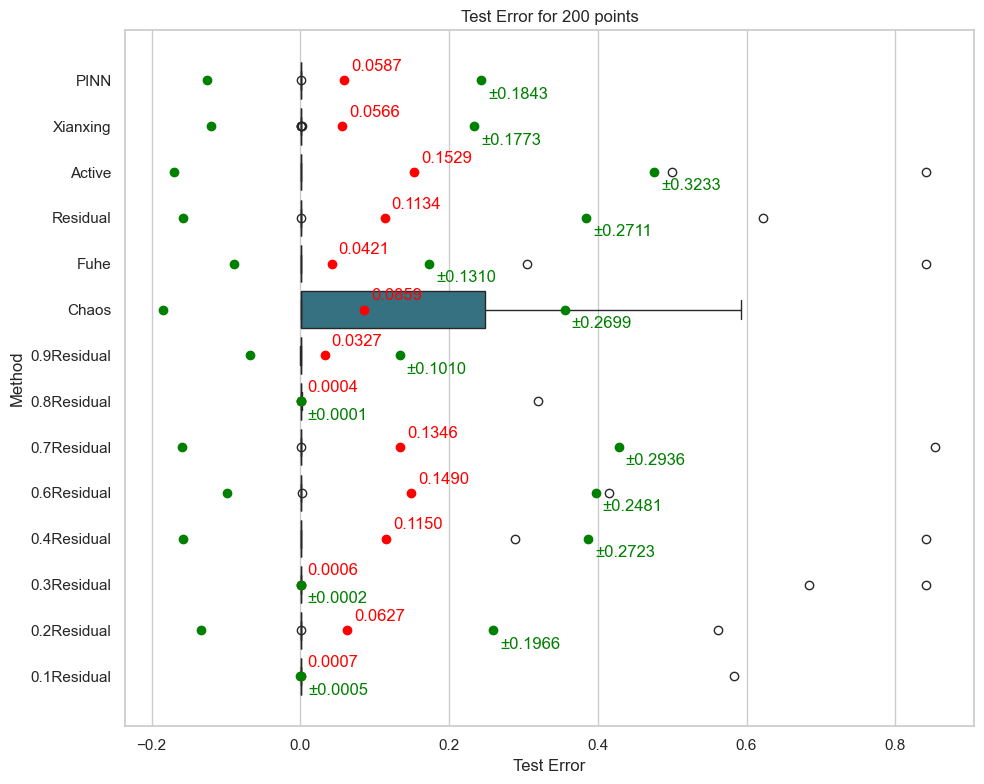

In [7]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Error_u']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('Test Error for 200 points')
ax.set_ylabel('Method')
ax.set_xlabel('Test Error')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.4f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.4f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

In [8]:
print((0.0006-0.0587)/0.0587)
print((0.0006-0.1134)/0.1134)

-0.989778534923339
-0.9947089947089947


C:\Users\cheny\AppData\Local\Temp\ipykernel_4420\1333386912.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


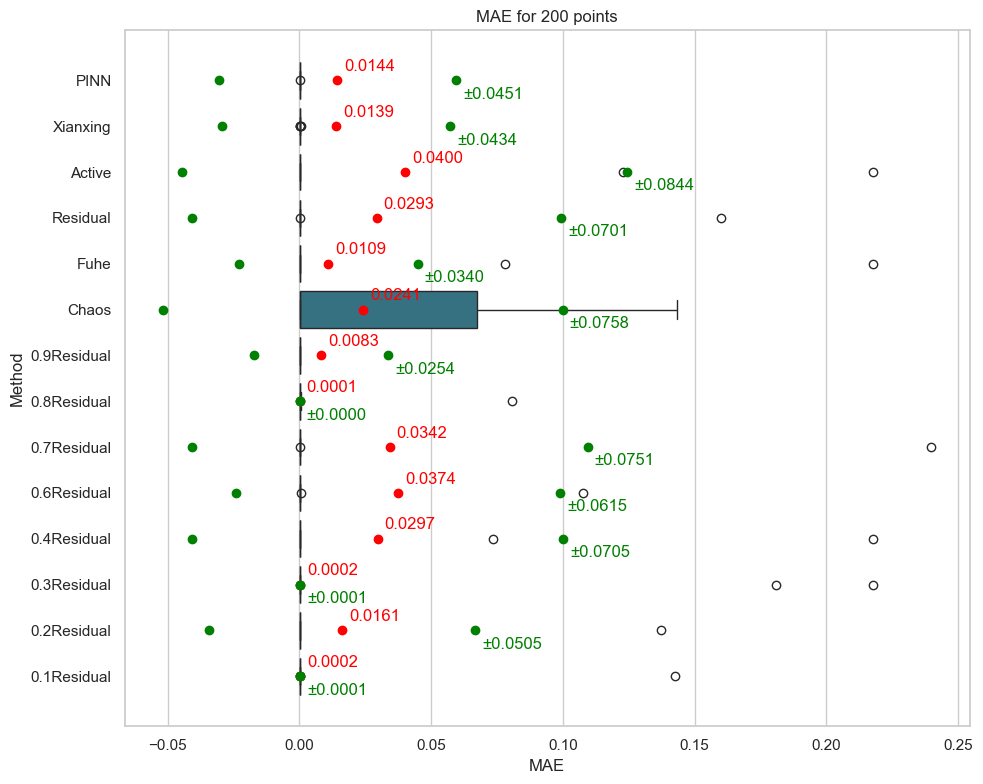

In [10]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'MAE']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('MAE for 200 points')
ax.set_ylabel('Method')
ax.set_xlabel('MAE')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.4f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.4f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_4420\3736851005.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


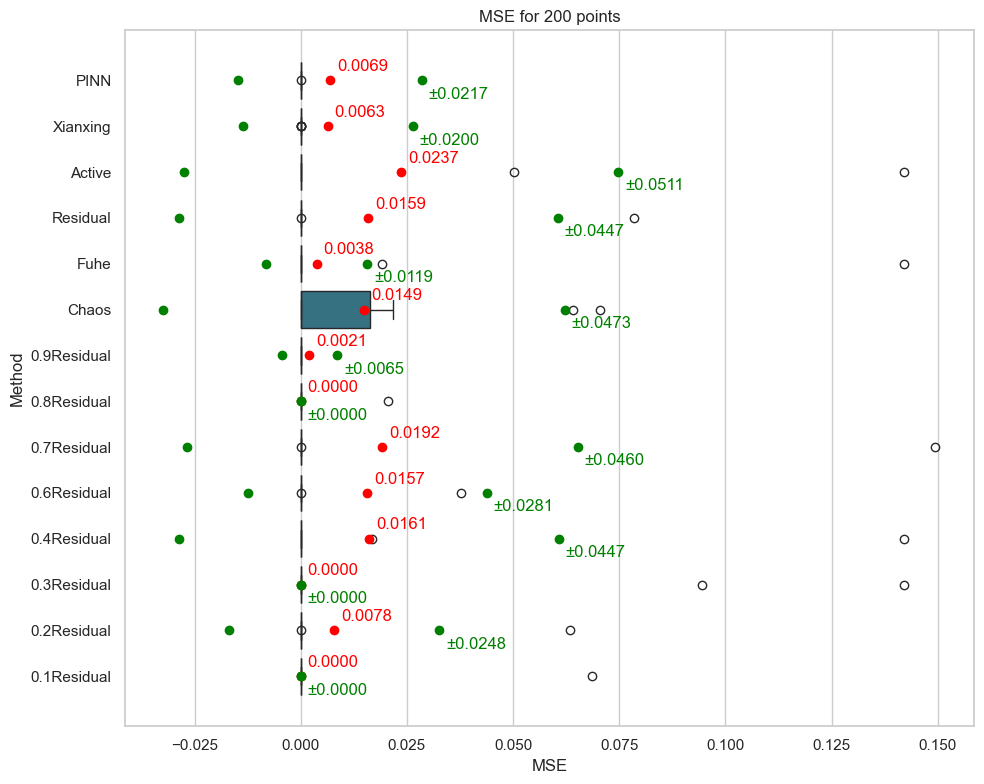

In [11]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'MSE']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('MSE for 200 points')
ax.set_ylabel('Method')
ax.set_xlabel('MSE')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.4f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.4f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_4420\1965969920.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


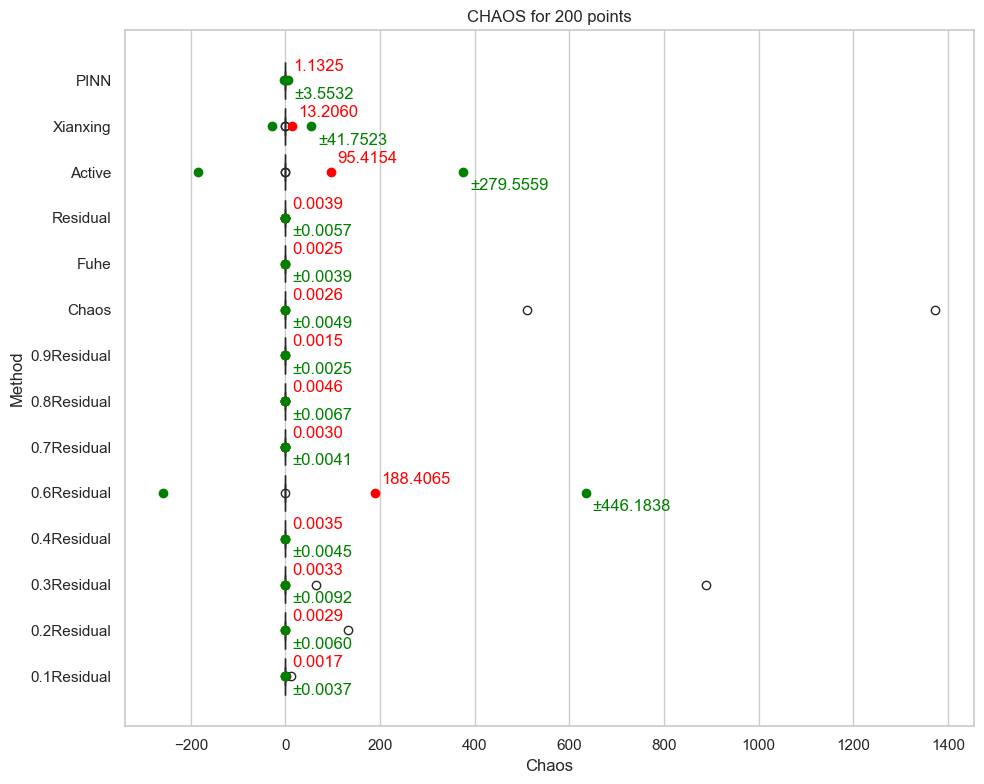

In [13]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Chaos']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('CHAOS for 200 points')
ax.set_ylabel('Method')
ax.set_xlabel('Chaos')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.4f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.4f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_4420\1758888948.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


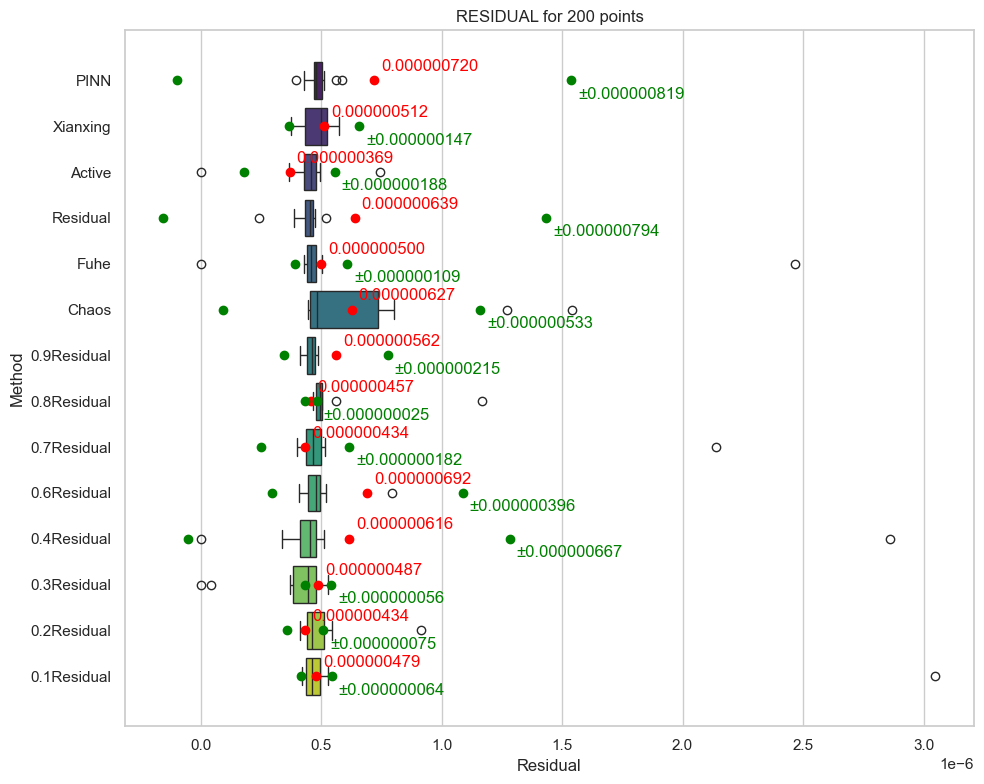

In [15]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Residual']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('RESIDUAL for 200 points')
ax.set_ylabel('Method')
ax.set_xlabel('Residual')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.9f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.9f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()